Populating the interactive namespace from numpy and matplotlib
(6, 10000)


/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


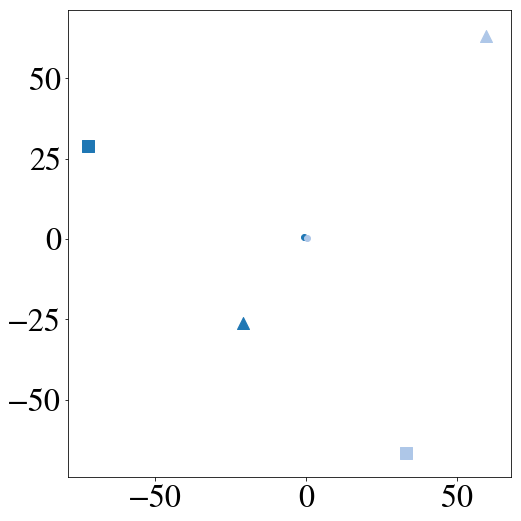

In [1]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['font.size'] = 32
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['figure.figsize'] = (7.2,4.45)
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.labelsize'] = 32
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 12
mpl.rcParams['legend.fontsize'] = 13
mpl.rcParams['mathtext.fontset'] = 'stix'      
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['lines.linewidth'] = 3.5
mpl.rcParams['xtick.labelsize'] = 32
mpl.rcParams['ytick.labelsize'] = 32
mpl.rcParams['legend.fontsize'] = 32

def setup_axis(ax):
    ax.set_xlabel('')
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.major.formatter._useMathText = True
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.tick_params(direction='out', length=12, 
                   width=2, 
                   grid_alpha=0.5)
    ax.tick_params(direction='out', which='minor', length=6, 
                   width=1, 
                   grid_alpha=0.5)
    ax.grid(True)
    

def simulate_data(n = 10, 
                  p = 10000, 
                  division_factor = 2,
                  seed = 42):
    np.random.seed(seed)
    X1 = np.random.randn(n, p)  
    X2 = np.random.randn(n, p)
    X3 = (X1+X2)/division_factor
    
    X = np.empty((X1.shape[0] + X2.shape[0] + X3.shape[0], X1.shape[1]), dtype=X1.dtype)
    print(X.shape)
    X[0::3,:] = X1
    X[1::3,:] = X2
    X[2::3,:] = X3
    X = X - np.mean(X, axis=0)
    U, s, V = np.linalg.svd(X, full_matrices=False)
    X = U @ np.diag(s)
    return X


n = 2
fig, ax = plt.subplots(figsize=(8, 8))
X = simulate_data(n, division_factor = 200)
for i in range(n):
    color = sns.color_palette("tab20")[i]
    plt.scatter(X[i*3,0], X[i*3,1], marker='s', color=color)
    plt.scatter(X[i*3+1,0], X[i*3+1,1], marker='^', color=color)
    plt.scatter(X[i*3+2,0], X[i*3+2,1], marker='.', color=color)
    
fig.tight_layout()


(6, 10000)


/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


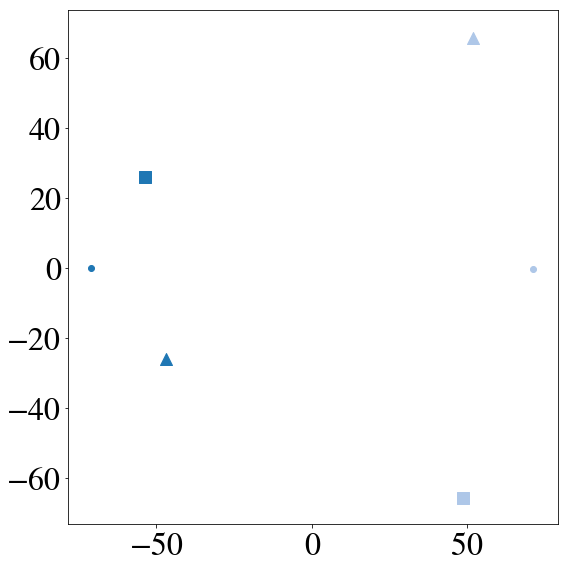

In [2]:
fig, ax = plt.subplots(figsize=(8, 8))
X = simulate_data(n, division_factor = np.sqrt(2))
for i in range(n):
    color = sns.color_palette("tab20")[i]
    plt.scatter(X[i*3,0], X[i*3,1], marker='s', color=color)
    plt.scatter(X[i*3+1,0], X[i*3+1,1], marker='^', color=color)
    plt.scatter(X[i*3+2,0], X[i*3+2,1], marker='.', color=color)
    
fig.tight_layout()